# Rappel Machine Learning 2019/2020 :

Les trois séances utiliseront le même jeu de données, [à télécharger ici](http://www-connex.lip6.fr/~baskiotisn/ML/arxiv-2010-2017.json.gz). Ce jeu de données contient tous les articles publiés sur [arxiv](https://arxiv.org/) (un site d'open-access pour article scientifique) de 2010 à 2017, avec les informations des auteurs, [domaine](https://arxiv.org/category_taxonomy), date de publication, titre et résumé, doi du journal de publication si disponible, etc.

Le programme des séances est le suivant : 
* Mardi : analyse exploratoire des données et étude du comportement des publications en fonction des domaines
* Mercredi : apprentissage non supervisé sur le corpus  à partir des résumés
* Jeudi : apprentissage supervisé pour classifier dans la/les bonnes catégories à partir des résumés. 

L'objectif de ces séances est de vous remettre à niveau à la fois en apprentissage statistique et en programmation python. N'hesitez pas à explorer vos propres pistes à partir des indications (très limitées) de l'énoncé, d'expérimenter et d'explorer les sujets sur lesquels vous n'êtes pas à l'aise. 

Côté programmation, la consigne principale est : **ne jamais faire de boucle** (pour du calcul numérique). Vous pouvez utiliser tous les modules python qui vous semblent nécessaires (sauf contre-indication) : ***sklearn, pandas, nltk, matplotlib, seaborn ...***



Dans toute cette série de séances : 
* on considère comme date de publication de l'article la date correspondant à la première version (v1)
* on ne prend en compte que les articles qui ont un champ ***doi*** non vide (articles publiés par ailleurs dans des conférences ou revues)
* seules les informations sur la date de publication, les catégories des articles et le résumé seront considérés.

Pour cette première séance, on ne travaillera que sur la date de publication et les catégories des articles.

## Analyse exploratoire des données

Proposez dans un premier temps des visualisations qui permettent d'appréhender les données de manière simple.

Choisissez trois catégories/communautés (par exemple **cs.AI**, **math.CA**, **physics.optics**) et observez le rythme des publications dans chacune en fonction du mois selon les années, puis en fonction du mois et du jour de la semaine en fonction des années.

On aimerait :
* comprendre à quel point les publications sont faites de manière eparpillée ou si il existe des moments privilégiés où les scientifiques publient (en fonction des communautés et des années);
* comparer les habitudes de publications dans une même communauté en fonction des années;
* comparer les habitudes de publications entre les communautés en fonction des années.

Quelques questions pour vous guider : 
* Quels outils visuels proposez vous (évaluation qualitative) ? 
* Quels outils pour une évaluation quantitative ?
* Doit-on se satisfaire d'une modélisation discrète ou une modélisation continue est nécessaire ?
* Comment régler les hyper-paramètres ?



In [22]:
import json
from datetime import datetime
import sklearn
import numpy as np
from scipy.sparse import csr_matrix,lil_matrix
from calendar import monthrange
import gzip
import matplotlib.pyplot as plt

In [25]:
FILENAME = "arxiv-2010-2017.json.gz"

def read_arxiv(f=FILENAME):
    res = dict()
    with  open(f) as fp:
        for l in fp:
            js = json.loads(l)
            res[js["id"]] = js
    return res

def get_dates(dic):
    return [datetime.strptime(x["created"],"%a, %d %b %Y %H:%M:%S GMT") for k in dic.values() for x in k["versions"] if x['version']=="v1"]
def get_day(d):
    return (d.weekday()+(d.hour+(d.minute+d.second/60)/60)/24)/7
def get_month(d):
    return d.month+(d.day-1+(d.hour+(d.minute+d.second/60)/60)/24)/monthrange(d.year,d.month)[1]

## Chargement des données

In [26]:
data = read_arxiv(f=FILENAME)
dates = get_dates(data)

## Visualisation

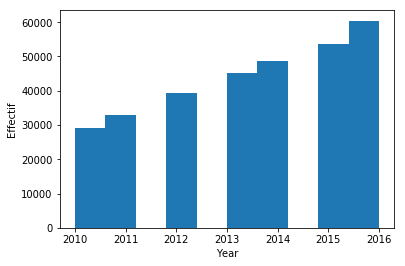

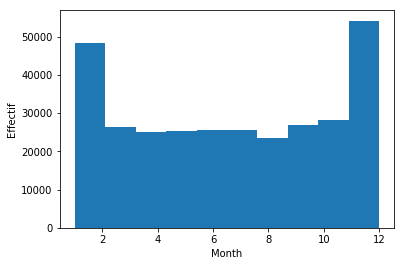

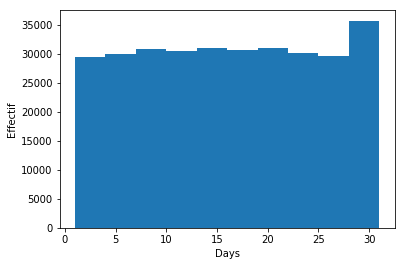

In [39]:
# Selon les années

years = np.array([date.year for date in dates])
plt.hist(years)
plt.xlabel("Year")
plt.ylabel("Effectif")
plt.plot()
plt.show()

# Selon les mois

month = np.array([date.month for date in dates])
plt.hist(month)
plt.xlabel("Month")
plt.ylabel("Effectif")
plt.plot()
plt.show()

# Selon les jours

days = [date.day for date in dates]
plt.hist(days)
plt.xlabel("Days")
plt.ylabel("Effectif")
plt.plot()
plt.show()

In [71]:
# Création des dictionnaires selon catégories

AI = {key:value for (key,value) in data.items() if value["categories"]=="cs.AI"}
PHY = {key:value for (key,value) in data.items() if value["categories"]=="physics.optics"}
MATH = {key:value for (key,value) in data.items() if value["categories"]=="math.CA"}

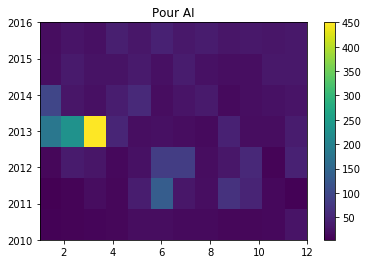

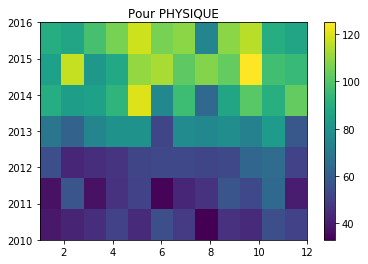

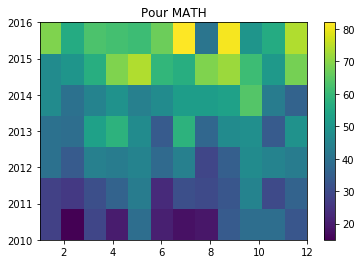

In [85]:
# Selon AI

dates_AI = get_dates(AI)
years_AI = np.array([date.year for date in dates_AI])
month_AI = np.array([date.month for date in dates_AI])
plt.hist2d(month_AI, years_AI, bins=[12, 7])
plt.title("Pour AI")
plt.colorbar()
plt.show()

# Selon PHY

dates_PHY = get_dates(PHY)
years_PHY = np.array([date.year for date in dates_PHY])
month_PHY = np.array([date.month for date in dates_PHY])
plt.hist2d(month_PHY, years_PHY, bins=[12, 7])
plt.title("Pour PHYSIQUE")
plt.colorbar()
plt.show()

# Selon MATH

dates_MATH = get_dates(MATH)
years_MATH = np.array([date.year for date in dates_MATH])
month_MATH = np.array([date.month for date in dates_MATH])
plt.hist2d(month_MATH, years_MATH, bins=[12, 7])
plt.title("Pour MATH")
plt.colorbar()
plt.show()

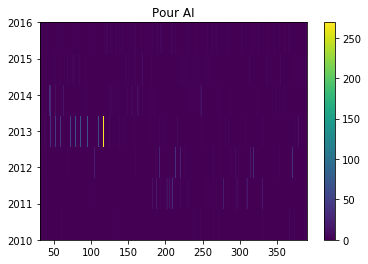

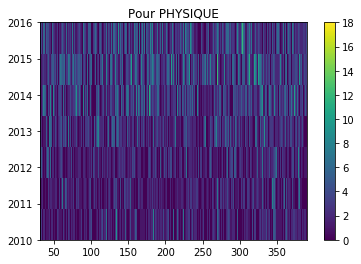

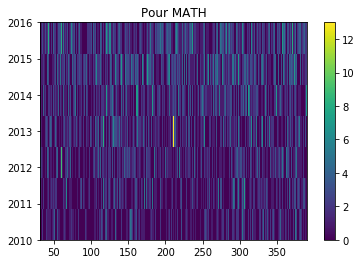

In [83]:
# Selon AI

dates_AI = get_dates(AI)
years_AI = np.array([date.year for date in dates_AI])
month_AI = np.array([date.month*30+date.day for date in dates_AI])
plt.hist2d(month_AI, years_AI, bins=[365, 7])
plt.title("Pour AI")
plt.colorbar()
plt.show()

# Selon PHY

dates_PHY = get_dates(PHY)
years_PHY = np.array([date.year for date in dates_PHY])
month_PHY = np.array([date.month*30+date.day for date in dates_PHY])
plt.hist2d(month_PHY, years_PHY, bins=[365, 7])
plt.title("Pour PHYSIQUE")
plt.colorbar()
plt.show()

# Selon MATH

dates_MATH = get_dates(MATH)
years_MATH = np.array([date.year for date in dates_MATH])
month_MATH = np.array([date.month*30+date.day for date in dates_MATH])
plt.hist2d(month_MATH, years_MATH, bins=[365, 7])
plt.title("Pour MATH")
plt.colorbar()
plt.show()

In [142]:
print(years_MATH)

[2010 2010 2010 ... 2016 2016 2016]


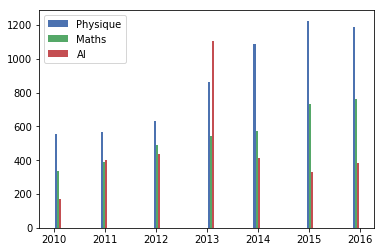

In [143]:
#plt.style.use('seaborn-deep')
bins = 50
plt.hist([years_PHY, years_MATH, years_AI], bins=b, label=["Physique", "Maths", "AI"])
plt.legend()
plt.show()

## Kernel Density

In [90]:
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import train_test_split

### MATH

In [97]:
coord = [(month_MATH[i], years_MATH[i]) for i in range(len(years_MATH))]
coord_train, coord_test, y_tr, y_te = train_test_split(coord, coord, test_size=0.2)

(5, 2013)


## GridSearch

In [102]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('kernD', KernelDensity())
     ])

parameters = {
    'kernD__bandwidth': (0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1),
    'kernD__kernel': ('gaussian', 'epanechnikov', 'exponential', 'linear')
}

grid_search = GridSearchCV(pipeline, parameters, cv=5)
grid_search.fit(coord)

C:\Users\Daoud\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:788: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('kernD',
                                        KernelDensity(algorithm='auto', atol=0,
                                                      bandwidth=1.0,
                                                      breadth_first=True,
                                                      kernel='gaussian',
                                                      leaf_size=40,
                                                      metric='euclidean',
                                                      metric_params=None,
                                                      rtol=0))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'kernD__bandwidth': (0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                              0.8, 0.9, 1),
                         'kernD__kernel': ('gaussian', 'epan

In [103]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'kernD__bandwidth': 1, 'kernD__kernel': 'exponential'}
-3954.0690250526154
